In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()        # for showing the first five row from our dataset

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [3]:
df = df.drop(['Summary','Precip Type','Temperature (C)','Wind Speed (km/h)','Wind Bearing (degrees)', 'Visibility (km)' , 'Pressure (millibars)', 'Daily Summary'],axis=1)
df.head()   #Now fetching first five row only

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


In [4]:
df.dtypes     

Formatted Date               object
Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

In [5]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc = True)
df['Formatted Date'].dtypes

datetime64[ns, UTC]

In [6]:
df = df.set_index('Formatted Date')         #setting formatted date as index
analysis_df = df[['Apparent Temperature (C)','Humidity']].resample('MS').mean()    #resampling data from hourly into monthly
analysis_df.head() 

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


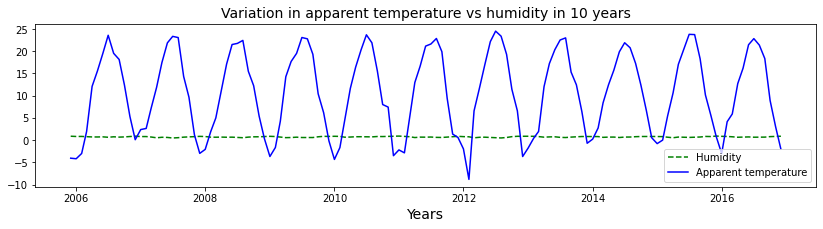

In [7]:
plt.figure(figsize = (14,3))
plt.plot(analysis_df['Humidity'],label='Humidity', color = 'green',linestyle = 'dashed' )
plt.plot(analysis_df['Apparent Temperature (C)'],label = 'Apparent temperature', color = 'blue')
plt.legend(loc=0,fontsize=10)
plt.title('Variation in apparent temperature vs humidity in 10 years',fontsize=14)
plt.xlabel('Years',fontsize = 14)
plt.show()

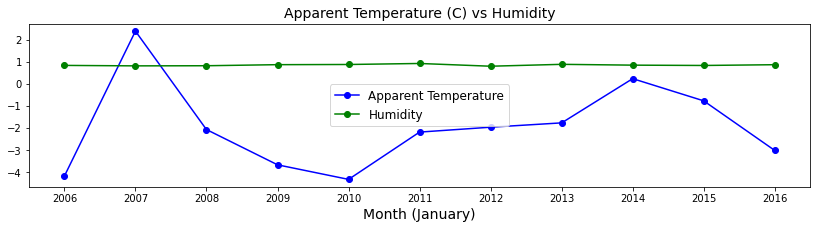

In [8]:
jan = analysis_df[analysis_df.index.month==1]

plt.figure(figsize=(14,3))
plt.plot(jan.loc['2006-01-01':'2016-01-01','Apparent Temperature (C)'],marker ='o',label='Apparent Temperature',color='blue')
plt.plot(jan.loc['2006-01-01':'2016-01-01','Humidity'],marker = 'o',label = 'Humidity',color = 'green')
plt.title('Apparent Temperature (C) vs Humidity',fontsize =14)
plt.legend(loc='center',fontsize=12)
plt.xlabel('Month (January)',fontsize=14)
plt.show()

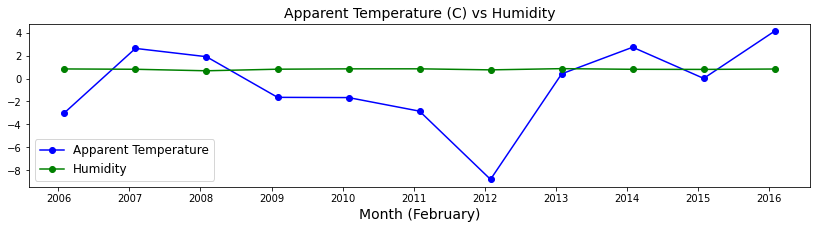

In [9]:
feb = analysis_df[analysis_df.index.month==2]
plt.figure(figsize=(14,3))
plt.plot(feb.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],marker ='o',label='Apparent Temperature',color='blue')
plt.plot(feb.loc['2006-02-01':'2016-02-01','Humidity'],marker = 'o',label = 'Humidity',color = 'green')
plt.title('Apparent Temperature (C) vs Humidity',fontsize =14)
plt.legend(fontsize=12)
plt.xlabel('Month (February)',fontsize=14)
plt.show()

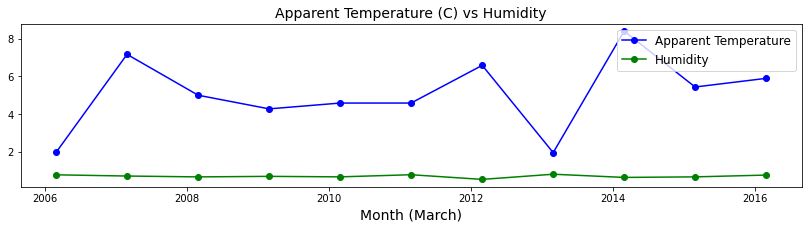

In [10]:
march = analysis_df[analysis_df.index.month==3]
plt.figure(figsize=(14,3))
plt.plot(march.loc['2006-03-01':'2016-03-01','Apparent Temperature (C)'],marker ='o',label='Apparent Temperature',color='blue')
plt.plot(march.loc['2006-03-01':'2016-03-01','Humidity'],marker = 'o',label = 'Humidity',color = 'green')
plt.title('Apparent Temperature (C) vs Humidity',fontsize =14)
plt.legend(fontsize=12)
plt.xlabel('Month (March)',fontsize=14)
plt.show()

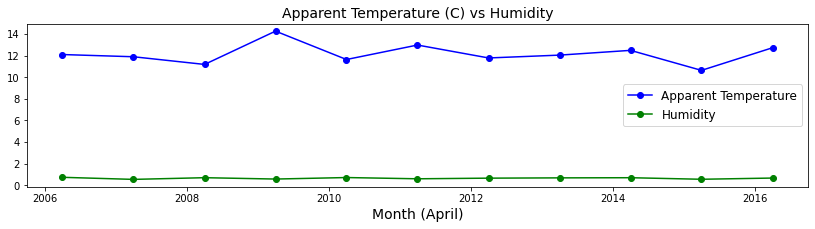

In [11]:
april = analysis_df[analysis_df.index.month==4]
plt.figure(figsize=(14,3))
plt.plot(april.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],marker ='o',label='Apparent Temperature',color='blue')
plt.plot(april.loc['2006-04-01':'2016-04-01','Humidity'],marker = 'o',label = 'Humidity',color = 'green')
plt.title('Apparent Temperature (C) vs Humidity',fontsize =14)
plt.legend(fontsize=12)
plt.xlabel('Month (April)',fontsize=14)
plt.show()

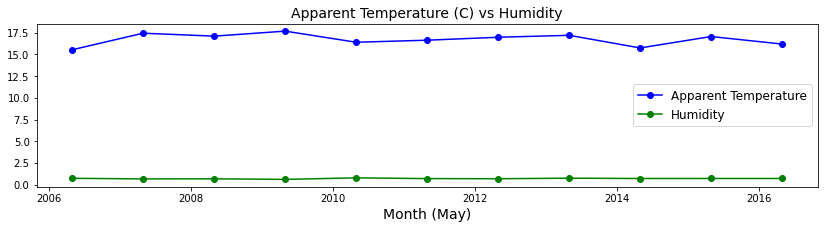

In [12]:
may = analysis_df[analysis_df.index.month==5]
plt.figure(figsize=(14,3))
plt.plot(may.loc['2006-05-01':'2016-05-01','Apparent Temperature (C)'],marker ='o',label='Apparent Temperature',color='blue')
plt.plot(may.loc['2006-05-01':'2016-05-01','Humidity'],marker = 'o',label = 'Humidity',color = 'green')
plt.title('Apparent Temperature (C) vs Humidity',fontsize =14)
plt.legend(fontsize=12)
plt.xlabel('Month (May)',fontsize=14)
plt.show()

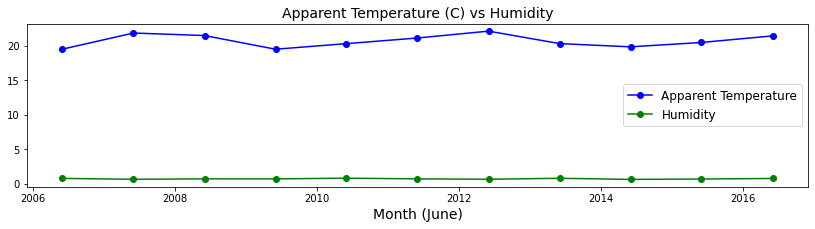

In [13]:
june = analysis_df[analysis_df.index.month==6]
plt.figure(figsize=(14,3))
plt.plot(june.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'],marker ='o',label='Apparent Temperature',color='blue')
plt.plot(june.loc['2006-06-01':'2016-06-01','Humidity'],marker = 'o',label = 'Humidity',color = 'green')
plt.title('Apparent Temperature (C) vs Humidity',fontsize =14)
plt.legend(fontsize=12)
plt.xlabel('Month (June)',fontsize=14)
plt.show()

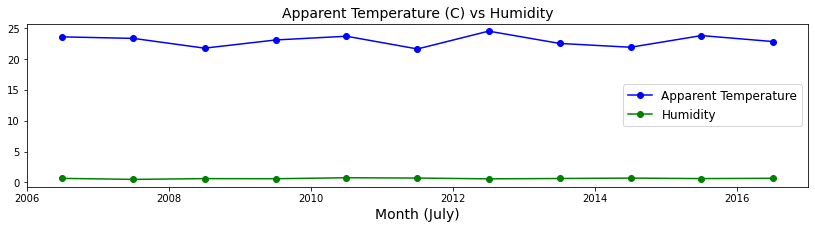

In [14]:
july = analysis_df[analysis_df.index.month==7]
plt.figure(figsize=(14,3))
plt.plot(july.loc['2006-07-01':'2016-07-01','Apparent Temperature (C)'],marker ='o',label='Apparent Temperature',color='blue')
plt.plot(july.loc['2006-07-01':'2016-07-01','Humidity'],marker = 'o',label = 'Humidity',color = 'green')
plt.title('Apparent Temperature (C) vs Humidity',fontsize =14)
plt.legend(fontsize=12)
plt.xlabel('Month (July)',fontsize=14)
plt.show()

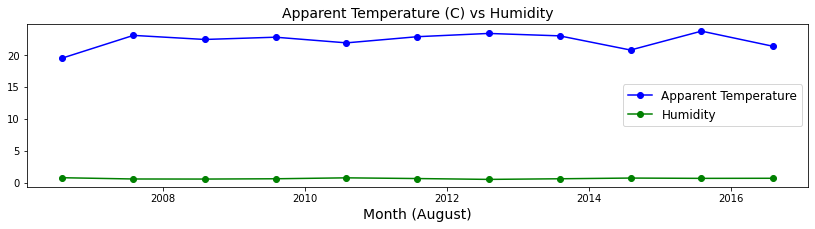

In [15]:
aug = analysis_df[analysis_df.index.month==8]
plt.figure(figsize=(14,3))
plt.plot(aug.loc['2006-08-01':'2016-08-01','Apparent Temperature (C)'],marker ='o',label='Apparent Temperature',color='blue')
plt.plot(aug.loc['2006-08-01':'2016-08-01','Humidity'],marker = 'o',label = 'Humidity',color = 'green')
plt.title('Apparent Temperature (C) vs Humidity',fontsize =14)
plt.legend(fontsize=12)
plt.xlabel('Month (August)',fontsize=14)
plt.show()

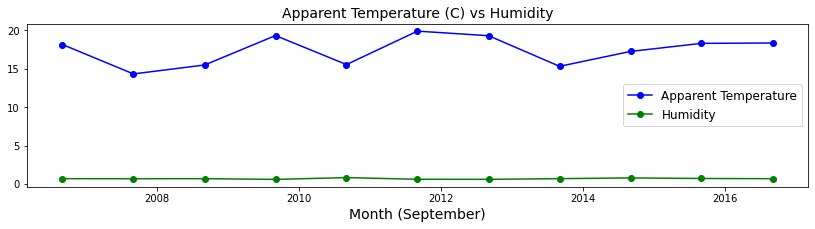

In [16]:
sep = analysis_df[analysis_df.index.month==9]
plt.figure(figsize=(14,3))
plt.plot(sep.loc['2006-09-01':'2016-09-01','Apparent Temperature (C)'],marker ='o',label='Apparent Temperature',color='blue')
plt.plot(sep.loc['2006-09-01':'2016-09-01','Humidity'],marker = 'o',label = 'Humidity',color = 'green')
plt.title('Apparent Temperature (C) vs Humidity',fontsize =14)
plt.legend(fontsize=12)
plt.xlabel('Month (September)',fontsize=14)
plt.show()

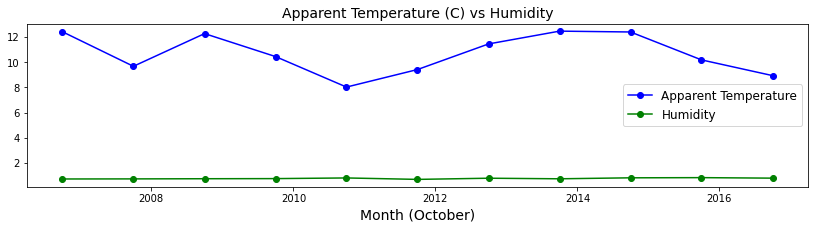

In [17]:
oct = analysis_df[analysis_df.index.month==10]
plt.figure(figsize=(14,3))
plt.plot(oct.loc['2006-10-01':'2016-10-01','Apparent Temperature (C)'],marker ='o',label='Apparent Temperature',color='blue')
plt.plot(oct.loc['2006-10-01':'2016-10-01','Humidity'],marker = 'o',label = 'Humidity',color = 'green')
plt.title('Apparent Temperature (C) vs Humidity',fontsize =14)
plt.legend(fontsize=12)
plt.xlabel('Month (October)',fontsize=14)
plt.show()

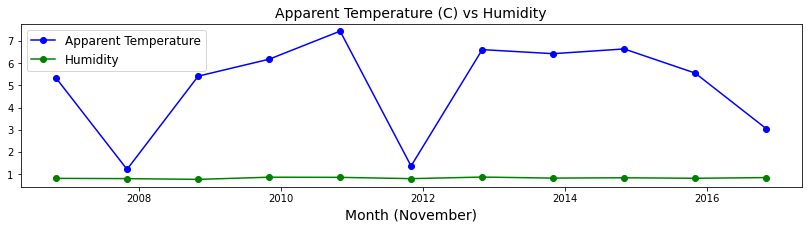

In [18]:
nov = analysis_df[analysis_df.index.month==11]
plt.figure(figsize=(14,3))
plt.plot(nov.loc['2006-11-01':'2016-11-01','Apparent Temperature (C)'],marker ='o',label='Apparent Temperature',color='blue')
plt.plot(nov.loc['2006-11-01':'2016-11-01','Humidity'],marker = 'o',label = 'Humidity',color = 'green')
plt.title('Apparent Temperature (C) vs Humidity',fontsize =14)
plt.legend(fontsize=12)
plt.xlabel('Month (November)',fontsize=14)
plt.show()

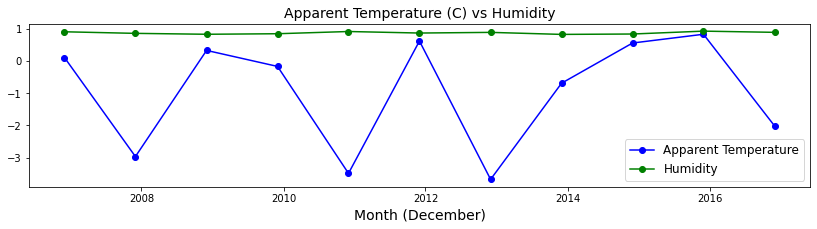

In [19]:
dec = analysis_df[analysis_df.index.month==12]
plt.figure(figsize=(14,3))
plt.plot(dec.loc['2006-12-01':'2016-12-01','Apparent Temperature (C)'],marker ='o',label='Apparent Temperature',color='blue')
plt.plot(dec.loc['2006-12-01':'2016-12-01','Humidity'],marker = 'o',label = 'Humidity',color = 'green')
plt.title('Apparent Temperature (C) vs Humidity',fontsize =14)
plt.legend(fontsize=12)
plt.xlabel('Month (December)',fontsize=14)
plt.show()